### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
#Make Seaborn look better for all of the future
sns.set_theme()

In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#Checking to see if everything has the correct type, and it seems like they do.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<AxesSubplot:>

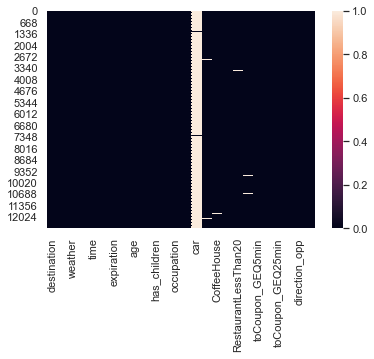

In [6]:
# a heatmap for visualization of NAs
sns.heatmap(data.isna())

In [7]:
#Quantifying the exact number of NAs
print(data.isna().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [8]:
#Look for duplicated rows
print(data.duplicated().sum())

#Let's see what these duplicated rows are
data_dupes = data[data.duplicated()]
data_dupes

#There is no proof that these duplicated rows are not valid, and there is not that many considering there are ~12,000 rows,
#we will not remove them

74


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#What is in the car colummn? Is it worth keeping? And what does NA represent
print(data['car'].unique())
#It appears to be some sort of purely qualitative field in which some of the responses are jokes, 
# and almost none of the responses are serious. We drop it
data = data.drop('car', axis = 1)

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


In [10]:
#What does NA represent in the case of Bar, CoffeeHouse, etc...
print(data['Bar'].unique())
# Since all numbers are covered, including never, less than 1 and greater than 8
#, we can assume NA represents legitimately missing data.
#With that being said, we have no need to drop it for now.

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [11]:
#Why is temperature like this? No reason to drop it though.
print(data['temperature'].unique())

[55 80 30]


In [12]:
#The passenger column is mispelled
data = data.rename({'passanger': 'passenger'}, axis=1)

In [13]:
data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



1    0.568433
0    0.431567
Name: Y, dtype: float64


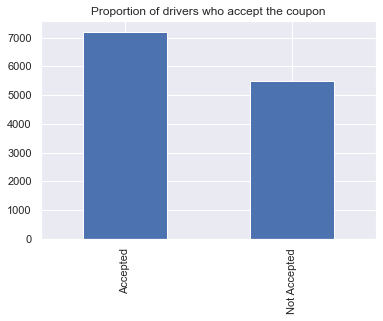

In [14]:
#get the exact proportion, and display for visualization purposes
data['Y'].value_counts().plot(kind= 'bar', label= 'Accepted', title='Proportion of drivers who accept the coupon')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])
print(data['Y'].value_counts(normalize = True))

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:title={'center':'Which coupons were most commonly offered?'}>

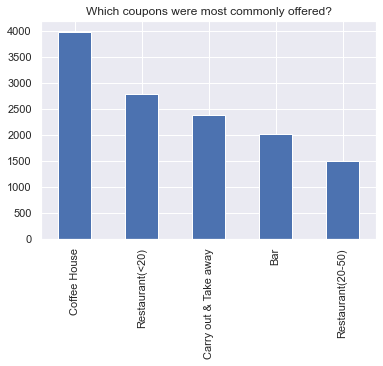

In [15]:
data['coupon'].value_counts().plot(kind= 'bar', title= 'Which coupons were most commonly offered?')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:>

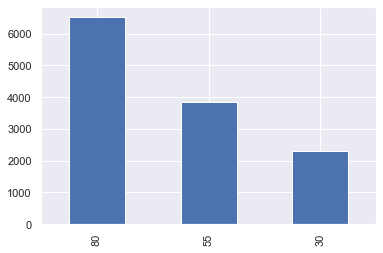

In [16]:
data['temperature'].value_counts().plot(kind = 'bar')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
data_bar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


0    0.589985
1    0.410015
Name: Y, dtype: float64


([<matplotlib.axis.XTick at 0x16cfdef2250>,
 [Text(0, 0, 'Accepted'), Text(1, 0, 'Not Accepted')])

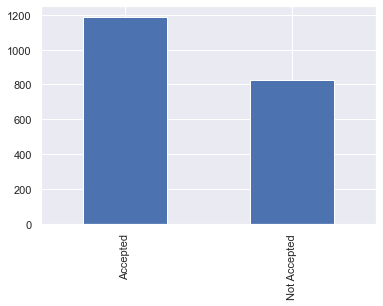

In [18]:
#Get absolute proportion and visualize
print(data_bar['Y'].value_counts(normalize= True))
data_bar['Y'].value_counts().plot(kind = 'bar')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
#We determined earlier that na data was in fact not valid
data_bar = data_bar.dropna()
print(data_bar['Bar'].unique())

['never' 'less1' '1~3' 'gt8' '4~8']


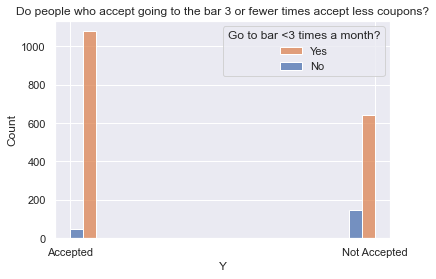

In [20]:
list_3_or_fewer =  ['never', 'less1', '1~3']
data_bar['Bar_3_or_fewer'] = data['Bar'].isin(list_3_or_fewer)
sns.histplot(data = data_bar, x= 'Y', hue = 'Bar_3_or_fewer', multiple = 'dodge').set(title = 'Do people who accept going to the bar 3 or fewer times accept less coupons?')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])
plt.legend(title = 'Go to bar <3 times a month?', labels = ['Yes', 'No'])

#### We can see that while most people go to the bar 3 or fewer times a month. Those people are actually more likely to accept the bar coupon, relatively speaking.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
print(data_bar['age'].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [22]:
#Find which drivers were over 25 and frequented bars more than once a month
list_less_than_1 = ['never', 'less1']
data_bar['Bar_1_or_more'] = ~data['Bar'].isin(list_less_than_1)
list_under_25 = ['below21', '21']
data_bar['Over_25'] = ~data['age'].isin(list_less_than_1)
data_bar['Over_25_and_1_or_more'] = data_bar['Over_25'] & data_bar['Bar_1_or_more']

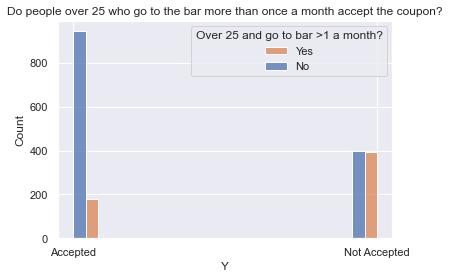

In [23]:
sns.histplot(data = data_bar, x= 'Y', hue = 'Over_25_and_1_or_more', multiple = 'dodge', ).set(
    title = 'Do people over 25 who go to the bar more than once a month accept the coupon?')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])
plt.legend(title = 'Over 25 and go to bar >1 a month?', labels = ['Yes', 'No'])

#### Once again, the group of interest is less likely to accept the coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
print(data_bar['passenger'].unique())
print(data_bar['occupation'].unique())

['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']


In [25]:
data_bar['Not_kid'] = ~data_bar['passenger'].isin(['Kid(s)', 'Alone'])
data_bar['Not_fff'] = data_bar['occupation'] != 'Farming Fishing & Forestry'
data_bar['No_kid_no_fff_bar_more_than_1'] =  data_bar['Bar_1_or_more'] & data_bar['Not_kid'] & data_bar['Not_fff']

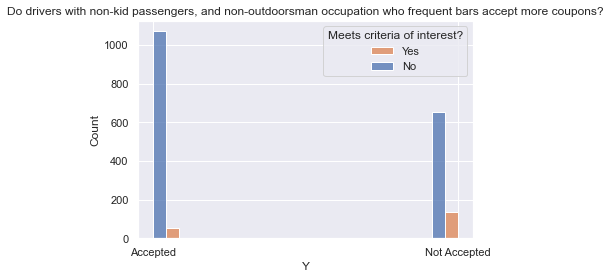

In [26]:
sns.histplot(data = data_bar, x= 'Y', hue = 'No_kid_no_fff_bar_more_than_1', multiple = 'dodge').set(
    title = 'Do drivers with non-kid passengers, and non-outdoorsman occupation who frequent bars accept more coupons?')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])
plt.legend(title = 'Meets criteria of interest?', labels = ['Yes', 'No'])

#### Not a big change from previous. These people accept less coupons

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



#### Marital Status Widowed, Non-kid Passenger, Frequents Bars

In [27]:
print(data_bar['maritalStatus'].unique())

['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


In [28]:
#Find drivers who meet the criteria
data_bar['Not_widowed'] = data_bar['maritalStatus'] != "Widowed"
data_bar['1_or_more_bar_not_widowed_or_kid'] = data_bar['Not_widowed'] & data_bar['Not_kid'] & data_bar['Bar_1_or_more']

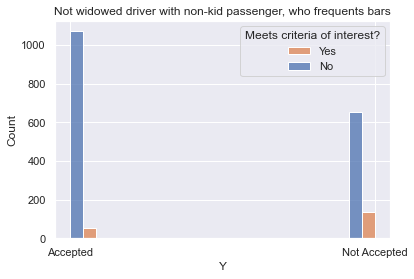

In [29]:
sns.histplot(data = data_bar, x= 'Y', hue = '1_or_more_bar_not_widowed_or_kid', multiple = 'dodge').set(
    title = 'Not widowed driver with non-kid passenger, who frequents bars')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])
plt.legend(title = 'Meets criteria of interest?', labels = ['Yes', 'No'])

#### Under 30 who frequents bars

In [30]:
list_under_30 = ['below21', '21', '26']
data_bar['Over_30'] = ~data_bar['age'].isin(list_under_30)
data_bar['Over_30_1_or_more_bar'] = data_bar['Over_30'] & data_bar['Bar_1_or_more']

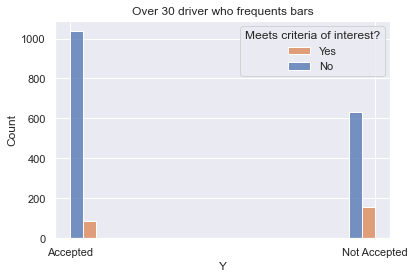

In [31]:
sns.histplot(data = data_bar, x= 'Y', hue = 'Over_30_1_or_more_bar', multiple = 'dodge').set(
    title = 'Over 30 driver who frequents bars')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])
plt.legend(title = 'Meets criteria of interest?', labels = ['Yes', 'No'])

#### Cheap restaraunts > 4, income <50k

In [32]:
#Find drivers who meet the criteria
print(data_bar['RestaurantLessThan20'].unique())
print(data_bar['income'].unique())
rest_more_than_4 = ['4~8', 'gt8']
income_less_than_50 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
data_bar['Rest_More_than_4'] = data_bar['RestaurantLessThan20'].isin(rest_more_than_4)
data_bar['Income_less_than_50'] = data_bar['income'].isin(income_less_than_50)
data_bar['Income_less_than_50_and_Rest_More_than_4' ] = data_bar['Rest_More_than_4'] & data_bar['Income_less_than_50']

['4~8' '1~3' 'less1' 'gt8' 'never']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


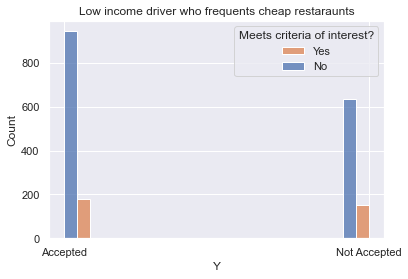

In [33]:
sns.histplot(data = data_bar, x= 'Y', hue = 'Income_less_than_50_and_Rest_More_than_4', multiple = 'dodge').set(
    title = 'Low income driver who frequents cheap restaraunts')
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])
plt.legend(title = 'Meets criteria of interest?', labels = ['Yes', 'No'])

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### Hypothesis: Drivers who go to bars less than once a month are actually more likely to accept the bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [34]:
#Remind ourselves, what coupon groups exist
print(data['coupon'].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [35]:
#Among coupon groups, which is the largest in the population?
print(data['coupon'].value_counts())

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


In [36]:
#Let's start our investigation with Coffee House coupons then
data_ch = data[data['coupon'] == 'Coffee House']

### Is there a relationship between time of day, and a Coffee House coupon getting accepted?

In [37]:
#First we must see what options exist for time:
print(data['time'].unique())
#It is different from what the data dictionary says, so good thing we checked
#There are no nulls, and the data makes sense in general, so we are good to move forward

['2PM' '10AM' '6PM' '7AM' '10PM']


In [38]:
data_ch['time'] = pd.Categorical(data_ch['time'], ['7AM', '10AM', '2PM', '6PM', '10PM'])

<ipython-input-38-0238a2865563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['time'] = pd.Categorical(data_ch['time'], ['7AM', '10AM', '2PM', '6PM', '10PM'])


In [39]:
data_ch

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


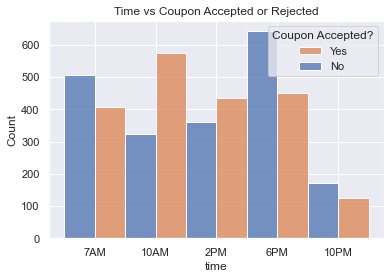

In [40]:
sns.histplot(data = data_ch, x= 'time', hue = 'Y', multiple = 'dodge').set(
    title = 'Time vs Coupon Accepted or Rejected')
plt.legend(title = 'Coupon Accepted?', labels = ['Yes', 'No'])

#### We can see that they are most likely to accept around 10am, and curiously less like likely to accept around 7am, although not accepting during 6 and 10pm make sense

#### Let's test if the reason they reject it at 7am may be due to the fact that they're on their way to work. Do driver's reject their coupon on the way to work?

In [41]:

data_ch['dest_work'] = data_ch['destination'] == "Work"

<ipython-input-41-c4739e768fcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['dest_work'] = data_ch['destination'] == "Work"


([<matplotlib.axis.XTick at 0x16cff6e2a00>,
 [Text(0, 0, 'Accepted'), Text(1, 0, 'Not Accepted')])

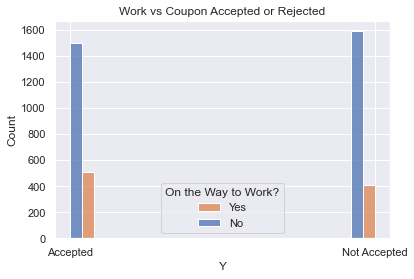

In [42]:
sns.histplot(data = data_ch, x= 'Y', hue = 'dest_work', multiple = 'dodge').set(
    title = 'Work vs Coupon Accepted or Rejected')
plt.legend(title = 'On the Way to Work?', labels = ['Yes', 'No'])
plt.xticks([0,1], labels = ['Accepted', 'Not Accepted'])

#### It seems like this is not true, if anything, the people on their way to work accept more Coffee House Coupons by a small proportion

#### Another reason could be people taking their kids to school, let's look at the passengers people have at 7am

In [43]:
print(data_ch[data_ch['time'] == "7AM"]['passenger'].value_counts())

Alone    913
Name: passenger, dtype: int64


#### That must not be the answer

#### Let's look at a correlation heat map of features for the Coffee House coupons

<ipython-input-44-2e733c2c267d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_ch.corr()[['Y']].sort_values(by='Y', ascending=False))


<AxesSubplot:>

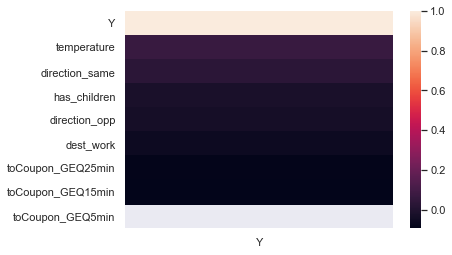

In [44]:
sns.heatmap(data_ch.corr()[['Y']].sort_values(by='Y', ascending=False))

#### The numerical values don't look promising for correlation, but maybe when the temperature is colder at 7am people are less likely to accept?

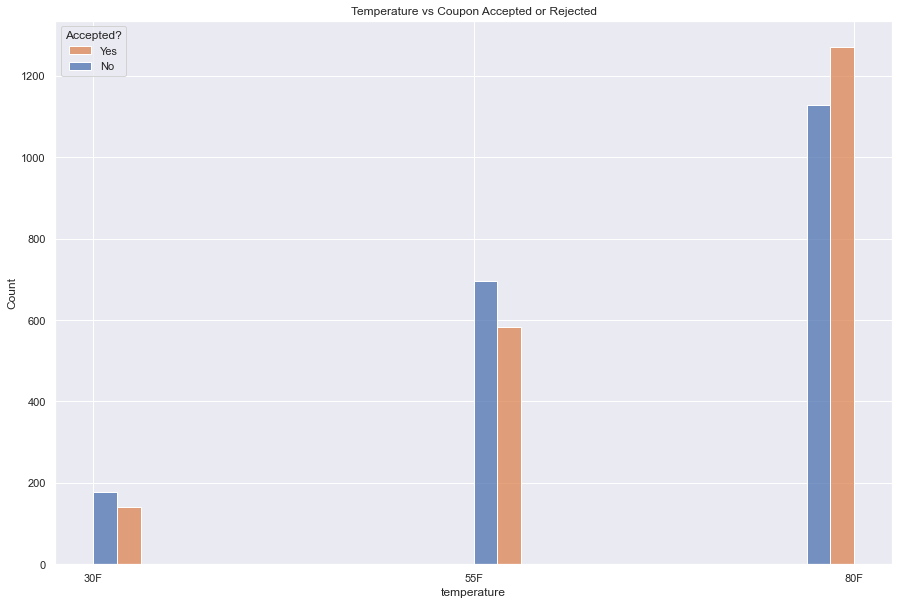

In [98]:
sns.histplot(data = data_ch, x= 'temperature', hue = 'Y', multiple = 'dodge').set(
    title = 'Temperature vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])
plt.xticks([30,55, 80], labels = ['30F', '55F', "80F"])
plt.savefig('figures/temp_vs_Y')

#### This may be the case, let's check at 7am, when the weather is cold

([<matplotlib.axis.XTick at 0x16cff8e0820>,
 [Text(30, 0, '30F'), Text(55, 0, '55F'), Text(80, 0, '80F')])

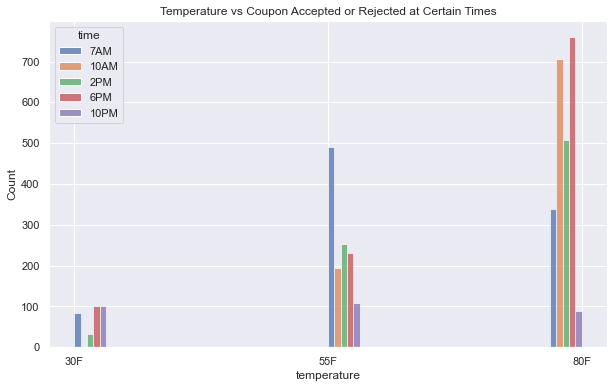

In [46]:
#We see a clear indicator that warm weather (above room temp) has more acceptances of coffee house coupons, is it colder at 7am?
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.histplot(data = data_ch, x= 'temperature', hue = 'time', multiple = 'dodge').set(
    title = 'Temperature vs Coupon Accepted or Rejected at Certain Times')
plt.xticks([30,55, 80], labels = ['30F', '55F', "80F"])


##### We clearly see now that it is far more likely to be 80F at 10am-6pm, which indicates that the weather itself may influence peoples' choice of accepting or rejecting the coupon. Though it does not tell the whole story since 6pm should have a lot of acceptances based on that info, but it does not. It is, however, likely that people still want to get coffee in the morning, but simply will not if the temperature is bad.

In [47]:
# Test if it's 7am, how the weather affects decision to accept
data_ch['is_7am'] = data_ch['time'] == '7AM'

<ipython-input-47-26ce3ef25538>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['is_7am'] = data_ch['time'] == '7AM'


([<matplotlib.axis.XTick at 0x16cffa3b580>,
 [Text(30, 0, '30F'), Text(55, 0, '55F'), Text(80, 0, '80F')])

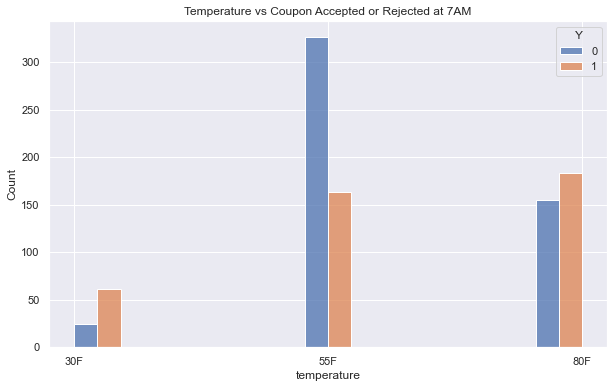

In [48]:
sns.histplot(data = data_ch[data_ch['is_7am'] == True], x= 'temperature', hue = 'Y', multiple = 'dodge').set(
    title = 'Temperature vs Coupon Accepted or Rejected at 7AM')
plt.xticks([30,55, 80], labels = ['30F', '55F', "80F"])

#### At 7am, when the temperature is 55F pople do not accept as often, but curiously they do accept at 30F. Jobs can be seasonal so maybe there is some factor related to their occupation regardless of whether they are on their way to work or not.

In [49]:
print(data_ch['occupation'].unique())

['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [89]:
#get percentage of acceptance by occupation
data_ch_ordered = data_ch[['occupation', 'Y', 'temperature']].groupby('occupation').describe()
data_ch_ordered.columns = [' '.join(col).strip() for col in data_ch_ordered.columns.values]
data_ch_ordered.sort_values("Y mean", inplace = True, ascending = False)
data_ch_ordered

,Y count,Y mean,Y std,Y min,Y 25%,Y 50%,Y 75%,Y max,temperature count,temperature mean,temperature std,temperature min,temperature 25%,temperature 50%,temperature 75%,temperature max
occupation,,,,,,,,,,,,,,,,
Healthcare Practitioners & Technical,74.0,0.743243,0.439826,0.0,0.25,1.0,1.0,1.0,74.0,67.162162,17.183161,30.0,55.0,80.0,80.0,80.0
Building & Grounds Cleaning & Maintenance,11.0,0.727273,0.467099,0.0,0.50,1.0,1.0,1.0,11.0,59.545455,21.846572,30.0,42.5,55.0,80.0,80.0
Student,499.0,0.625251,0.484544,0.0,0.00,1.0,1.0,1.0,499.0,69.078156,15.391540,30.0,55.0,80.0,80.0,80.0
Transportation & Material Moving,76.0,0.618421,0.489002,0.0,0.00,1.0,1.0,1.0,76.0,67.500000,16.583124,30.0,55.0,80.0,80.0,80.0
Healthcare Support,65.0,0.615385,0.490290,0.0,0.00,1.0,1.0,1.0,65.0,65.000000,18.114221,30.0,55.0,80.0,80.0,80.0
Installation Maintenance & Repair,44.0,0.568182,0.501056,0.0,0.00,1.0,1.0,1.0,44.0,66.931818,15.708682,30.0,55.0,80.0,80.0,80.0
Architecture & Engineering,63.0,0.555556,0.500895,0.0,0.00,1.0,1.0,1.0,63.0,69.285714,13.994732,30.0,55.0,80.0,80.0,80.0
Farming Fishing & Forestry,11.0,0.545455,0.522233,0.0,0.00,1.0,1.0,1.0,11.0,68.636364,17.188791,30.0,55.0,80.0,80.0,80.0
Unemployed,570.0,0.542105,0.498662,0.0,0.00,1.0,1.0,1.0,570.0,66.535088,17.273861,30.0,55.0,80.0,80.0,80.0


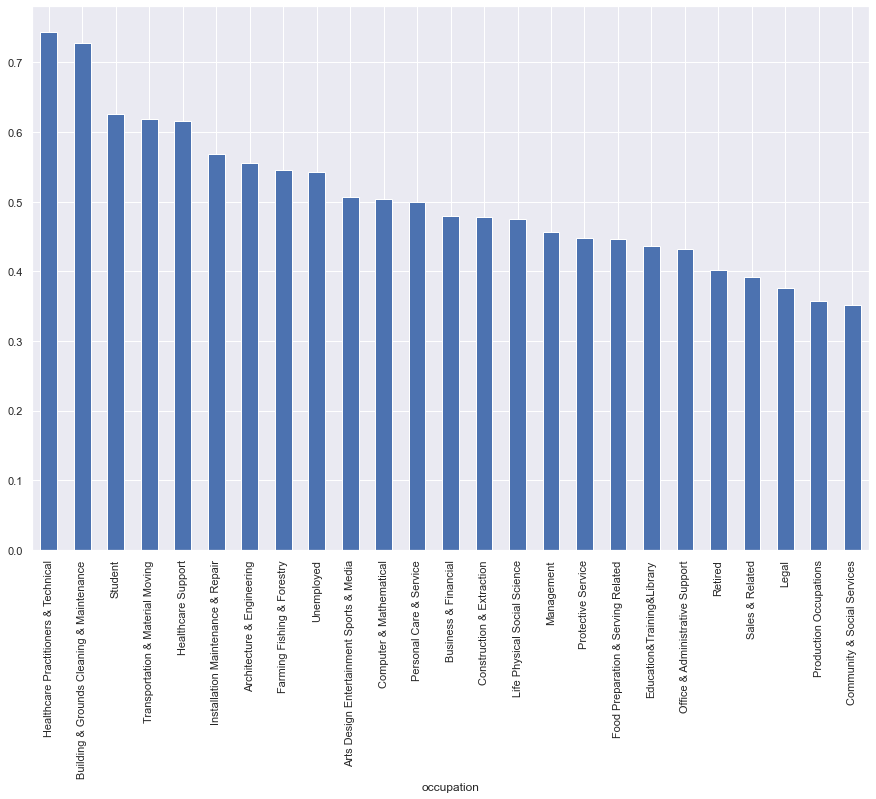

In [90]:
# First, do any jobs accept more in general?
sns.set(rc={'figure.figsize':(15,10)})
data_ch_ordered['Y mean'].plot(kind="bar")
plt.savefig('figures/job_vs_y')

In [94]:
# We need to do some statistics here to see if this is significant:
job_std = data_ch_ordered['Y mean'].std()
significant = job_std*2
job_mean = data_ch_ordered['Y mean'].mean()
significant_above = job_mean+significant
significant_below = job_mean-significant
data_sigificant = data_ch_ordered[(data_ch_ordered['Y mean'] > significant_above) | (data_ch_ordered['Y mean'] < significant_below)]
data_sigificant

,Y count,Y mean,Y std,Y min,Y 25%,Y 50%,Y 75%,Y max,temperature count,temperature mean,temperature std,temperature min,temperature 25%,temperature 50%,temperature 75%,temperature max
occupation,,,,,,,,,,,,,,,,
Healthcare Practitioners & Technical,74.0,0.743243,0.439826,0.0,0.25,1.0,1.0,1.0,74.0,67.162162,17.183161,30.0,55.0,80.0,80.0,80.0
Building & Grounds Cleaning & Maintenance,11.0,0.727273,0.467099,0.0,0.50,1.0,1.0,1.0,11.0,59.545455,21.846572,30.0,42.5,55.0,80.0,80.0


<AxesSubplot:xlabel='occupation'>

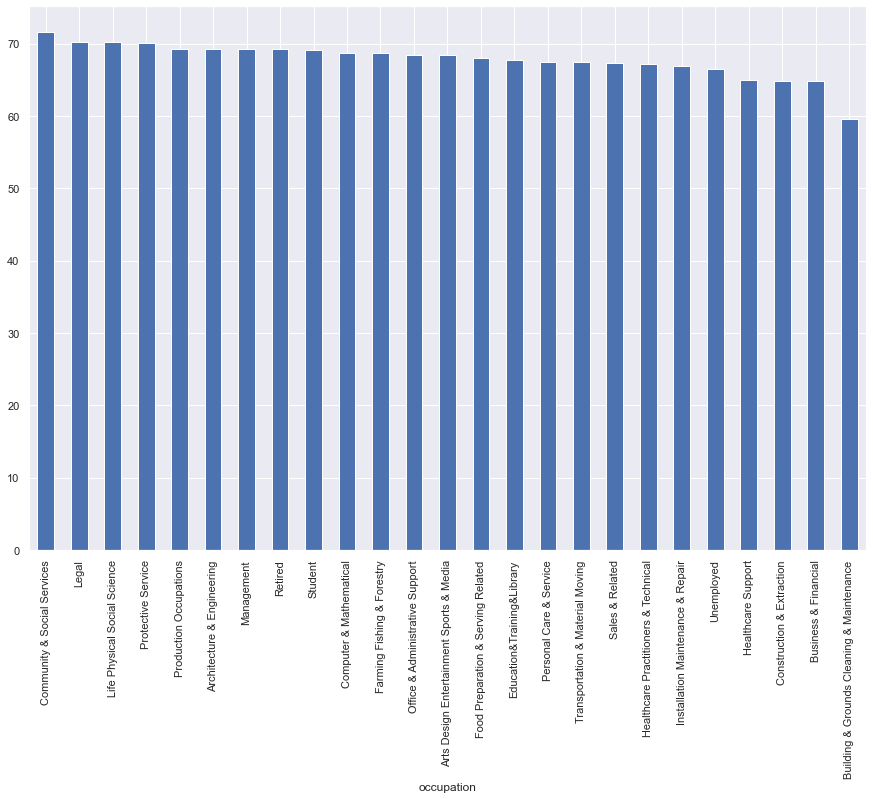

In [52]:
#How does each job react to temp?
sns.set(rc={'figure.figsize':(15,10)})
data_ch_ordered.sort_values("temperature mean", inplace = True, ascending = False)
data_ch_ordered['temperature mean'].plot(kind="bar")


In [53]:
# This looks like the opposite of what we hypothesized is true, is it really?
data_ch_ordered_temp = data_ch_ordered[['Y mean', "temperature mean"]]
data_ch_ordered_temp.corr()

,Y mean,temperature mean
Y mean,1.000000,-0.579257
temperature mean,-0.579257,1.000000


#### It is important to note that this does not necessarily show that these drivers are travelling to work, but it does suggest that people with certain jobs tend to travel in slightly different temperatures on average, and it suggests that within those groups, people who travel more often in colder weather are more likely to accept the Coffee House coupon.

#### Lastly let's examine acceptances by weather to conclude our study on how weather affects CH coupon acceptance


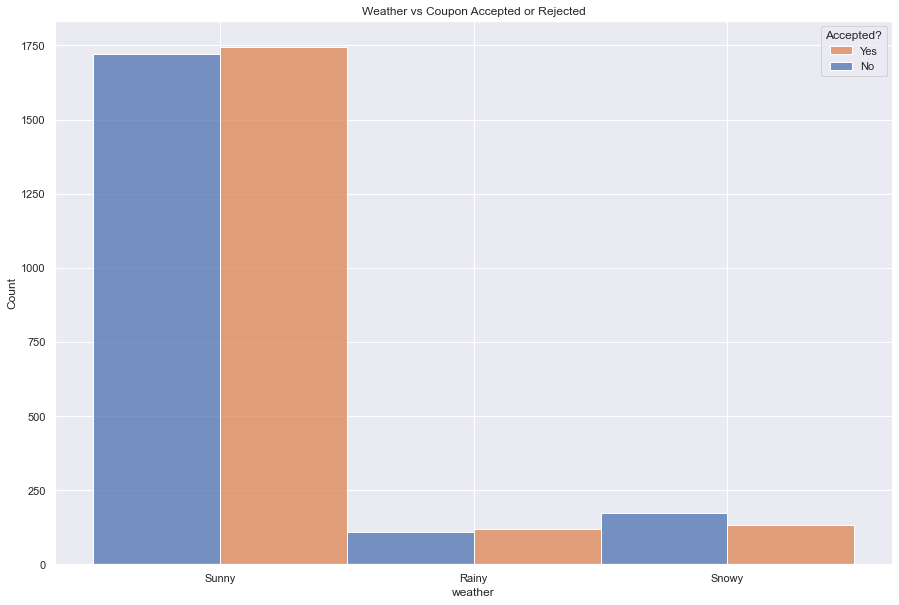

In [54]:
sns.histplot(data = data_ch, x= 'weather', hue = 'Y', multiple = 'dodge').set(
    title = 'Weather vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])

### Does income affect CH coupon acceptances?

#### We've already seen how jobs may affect CH coupon acceptance, now what about income itself?

In [55]:
print(data_ch['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [56]:
data_ch['income'] = pd.Categorical(data_ch['income'], ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
                                                    , '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999'
                                                    , '$100000 or More'])

<ipython-input-56-edef6c2799d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['income'] = pd.Categorical(data_ch['income'], ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'


<ipython-input-57-28b7c0b908e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch.sort_values('income', inplace=True, ascending = False)


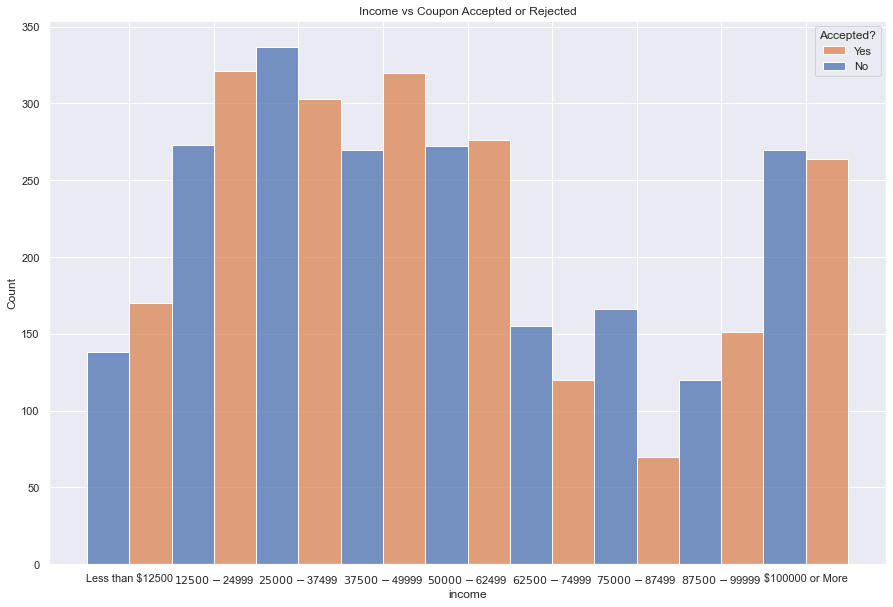

In [57]:
#Sort by income and visualize
data_ch.sort_values('income', inplace=True, ascending = False)
sns.histplot(data = data_ch, x= 'income', hue = 'Y', multiple = 'dodge').set(
    title = 'Income vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])

#### This seems pretty chaotic, doesn't seem like there is a strong direct relation between income and accepting the CH coupon

### Next, let's look at the relation between coffee house visits and acceptance

In [58]:
print(data_ch['CoffeeHouse'].unique())

['1~3' '4~8' 'never' 'less1' nan 'gt8']


In [59]:
#We determined earlier that NaNs are invalid since we cannot figure out if they represent anything. We will drop them, 
# since there are relatively few:
print(data_ch['CoffeeHouse'].isna().value_counts())
data_ch = data_ch[data_ch['CoffeeHouse'].notna()]

False    3924
True       72
Name: CoffeeHouse, dtype: int64


In [60]:
data_ch['CoffeeHouse'] = pd.Categorical(data_ch['CoffeeHouse'], ['never', 'less1', '1~3',  '4~8', 'gt8'])

<ipython-input-60-b8e29a9bf170>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['CoffeeHouse'] = pd.Categorical(data_ch['CoffeeHouse'], ['never', 'less1', '1~3',  '4~8', 'gt8'])


<ipython-input-61-2f63e7d9f1eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch.sort_values('CoffeeHouse', inplace=True, ascending = False)


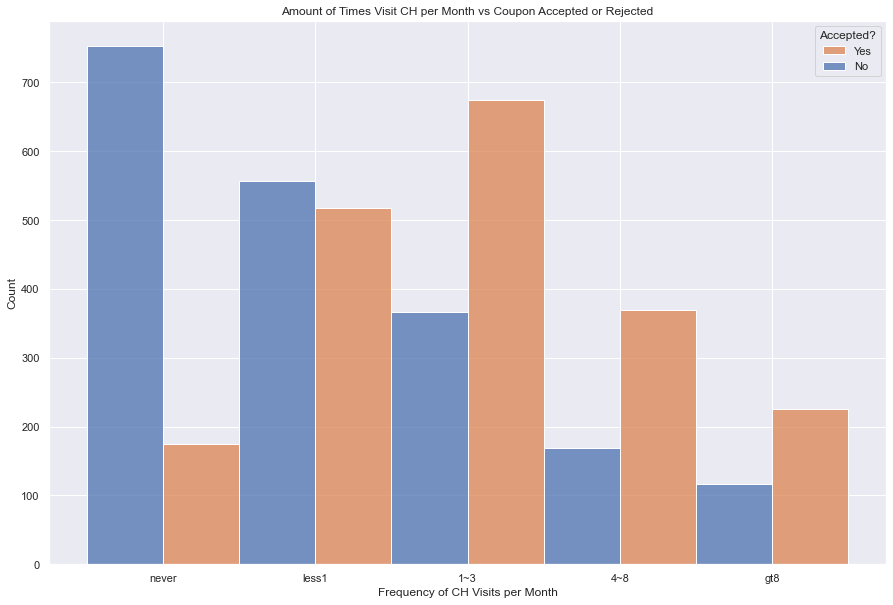

In [61]:
data_ch.sort_values('CoffeeHouse', inplace=True, ascending = False)
sns.histplot(data = data_ch, x= 'CoffeeHouse', hue = 'Y', multiple = 'dodge').set(
    title = 'Amount of Times Visit CH per Month vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])
plt.xlabel('Frequency of CH Visits per Month')
plt.savefig('figures/freq_ch_vs_Y')

#### In general, there is a strong correlation between visiting coffee houses more, and accepting the coupon. Now we need to know why. Let's examine other factors related to visiting coffee houses:

[Text(0.5, 1.0, 'Income vs Amount of Times Visit CH per Month')]

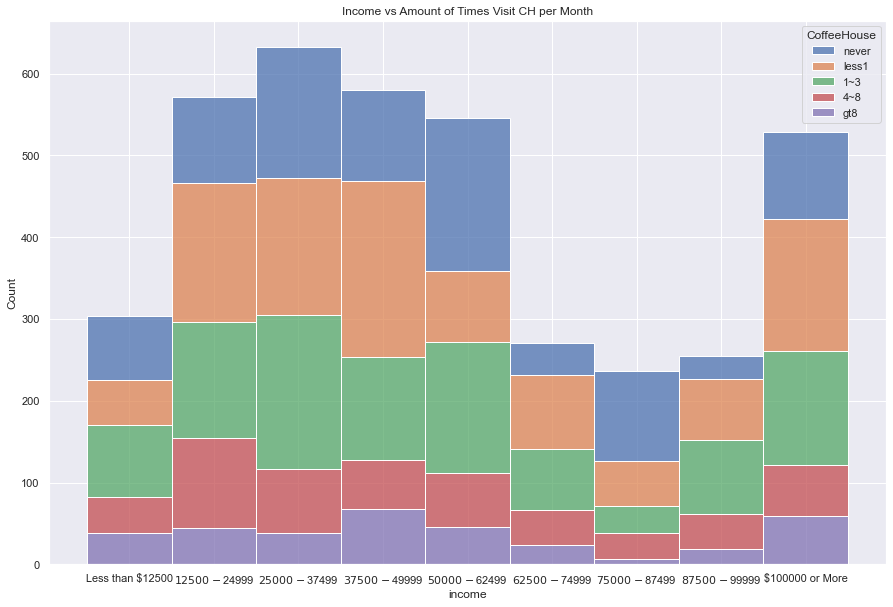

In [62]:
sns.histplot(data = data_ch, x= 'income', hue = 'CoffeeHouse', multiple = 'stack').set(
    title = 'Income vs Amount of Times Visit CH per Month')

#### As income increases, there doesn't seem to be any trend in how the Coffee House visits change. Let's look at temperature next:

[Text(0.5, 1.0, 'Temperature vs Amount of Times Visit CH per Month')]

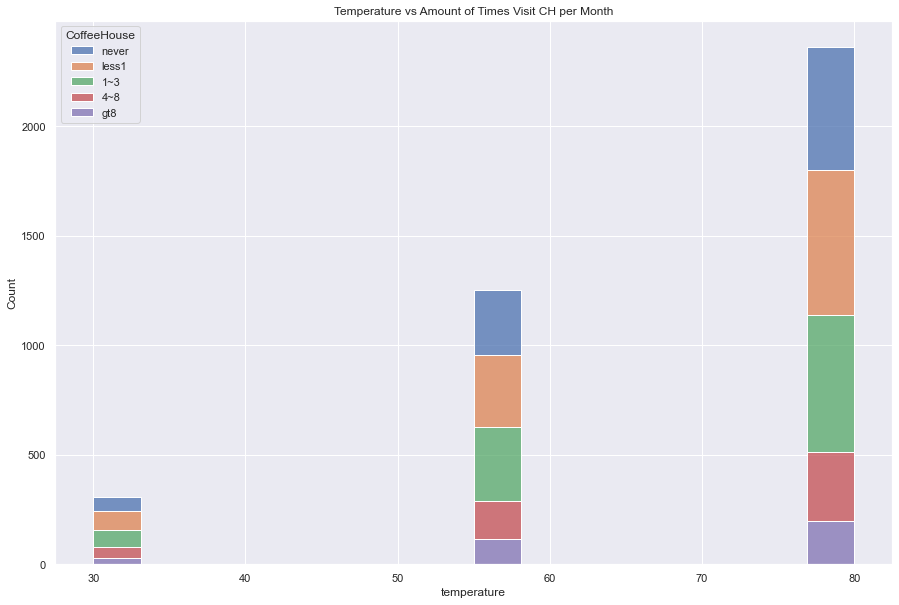

In [63]:
sns.histplot(data = data_ch, x= 'temperature', hue = 'CoffeeHouse', multiple = 'stack').set(
    title = 'Temperature vs Amount of Times Visit CH per Month')

#### No trend again, all temperatures seem proportionally similar. Let's look at age

In [64]:
print(data_ch['age'].unique())

['31' '26' '41' '21' '50plus' 'below21' '36' '46']


In [65]:
data_ch['age'] = pd.Categorical(data_ch['age'], ['below21', '21', '26',  '31', '36', '41', '46', '50plus'])

<ipython-input-65-332a440d0f0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['age'] = pd.Categorical(data_ch['age'], ['below21', '21', '26',  '31', '36', '41', '46', '50plus'])


[Text(0.5, 1.0, 'Age vs Amount of Times Visit CH per Month')]

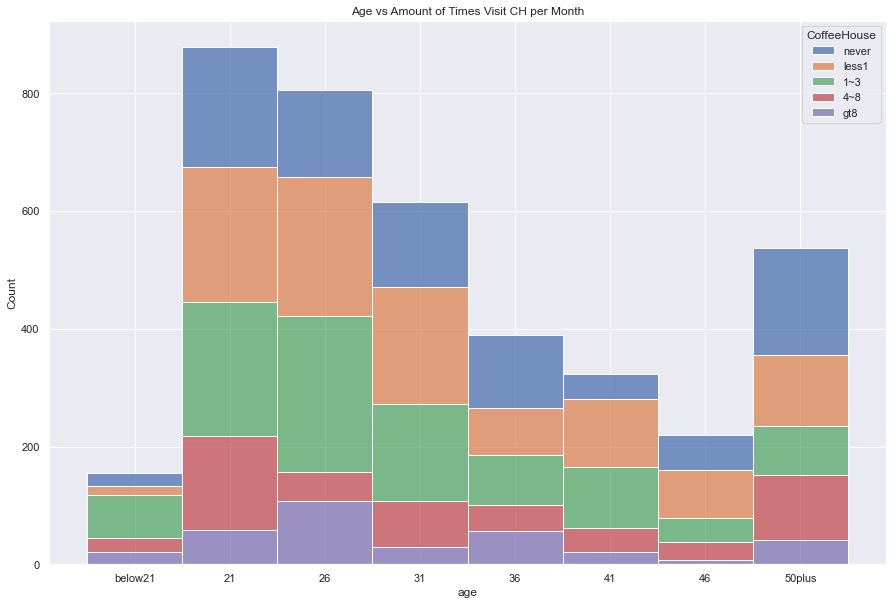

In [66]:
sns.histplot(data = data_ch, x= 'age', hue = 'CoffeeHouse', multiple = 'stack').set(
    title = 'Age vs Amount of Times Visit CH per Month')

#### Again, they are proportionally similar. Let's check what time they're driving vs CH visits

[Text(0.5, 1.0, 'Time vs Amount of Times Visit CH per Month')]

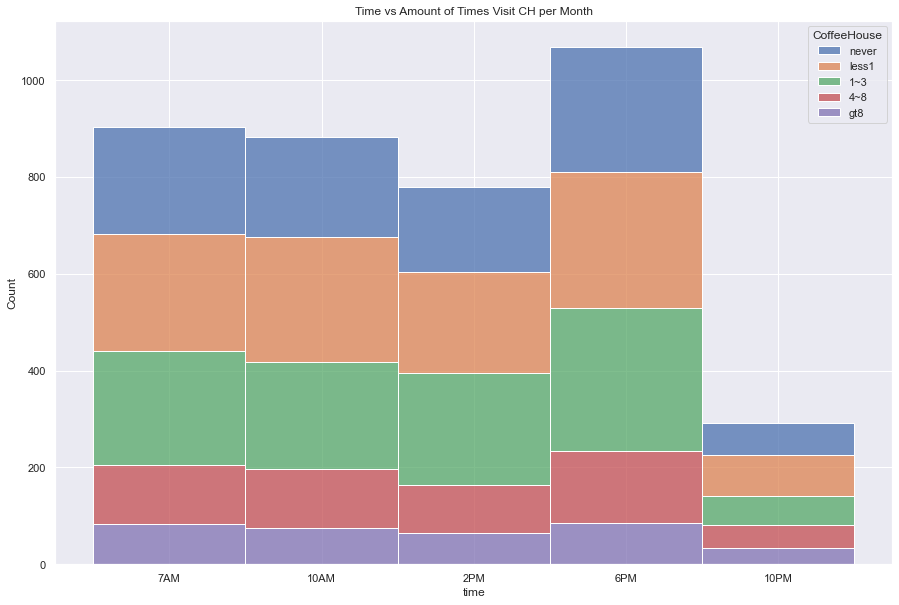

In [67]:
sns.histplot(data = data_ch, x= 'time', hue = 'CoffeeHouse', multiple = 'stack').set(
    title = 'Time vs Amount of Times Visit CH per Month')

#### Nothing again, at this point we can say it's very likely that people who go to coffee houses more often are much more likely to accept the coupon.

#### At this point it may also be helpful to look at whether or not they frequent bars and restaraunts and see if that has any correlation similar to the coffee houses:

In [68]:
#Need to order all of these columns and remove NAs from them:
#Bar, CarryAway, RestaurantLessThan20, Restaurant20To50
list_of_categories = ['Bar','CarryAway',  'RestaurantLessThan20', 'Restaurant20To50']
for cat in list_of_categories:
    data_ch = data_ch[data_ch[cat].notna()]
    data_ch[cat] = pd.Categorical(data_ch[cat], ['never', 'less1', '1~3',  '4~8', 'gt8'])
    print(data_ch[cat].unique())

['1~3', 'never', 'gt8', '4~8', 'less1']
Categories (5, object): ['never', 'less1', '1~3', '4~8', 'gt8']
['4~8', 'less1', 'gt8', '1~3', 'never']
Categories (5, object): ['never', 'less1', '1~3', '4~8', 'gt8']
['1~3', 'gt8', '4~8', 'less1', 'never']
Categories (5, object): ['never', 'less1', '1~3', '4~8', 'gt8']
['less1', 'never', '1~3', 'gt8', '4~8']
Categories (5, object): ['never', 'less1', '1~3', '4~8', 'gt8']


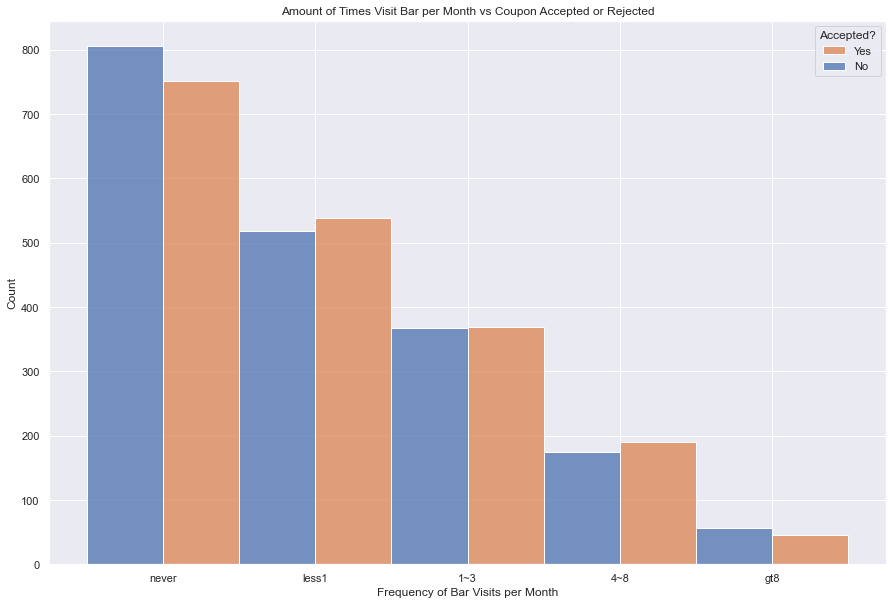

In [71]:
sns.histplot(data = data_ch, x= 'Bar', hue = 'Y', multiple = 'dodge').set(
    title = 'Amount of Times Visit Bar per Month vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])
plt.xlabel('Frequency of Bar Visits per Month')
plt.savefig('figures/bar_vs_Y')

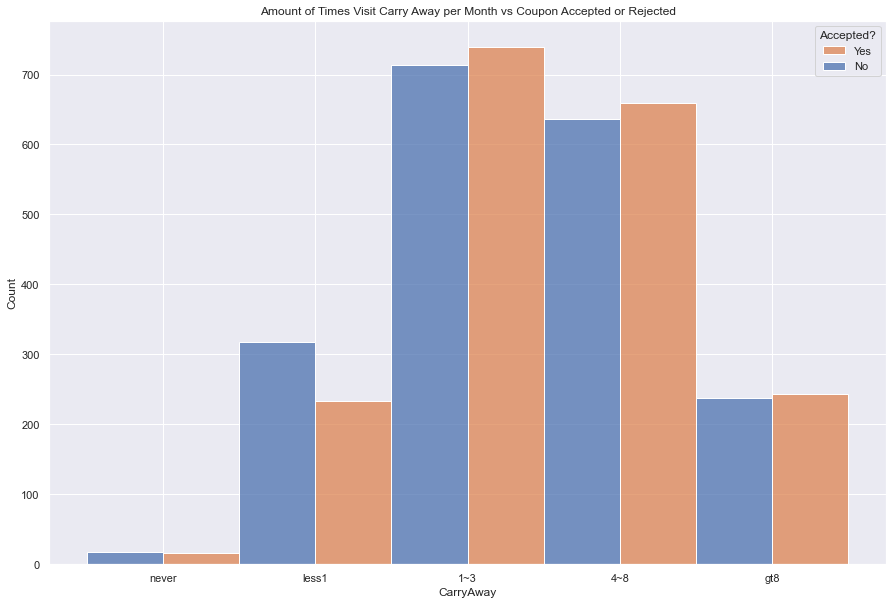

In [72]:
sns.histplot(data = data_ch, x= 'CarryAway', hue = 'Y', multiple = 'dodge').set(
    title = 'Amount of Times Visit Carry Away per Month vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])

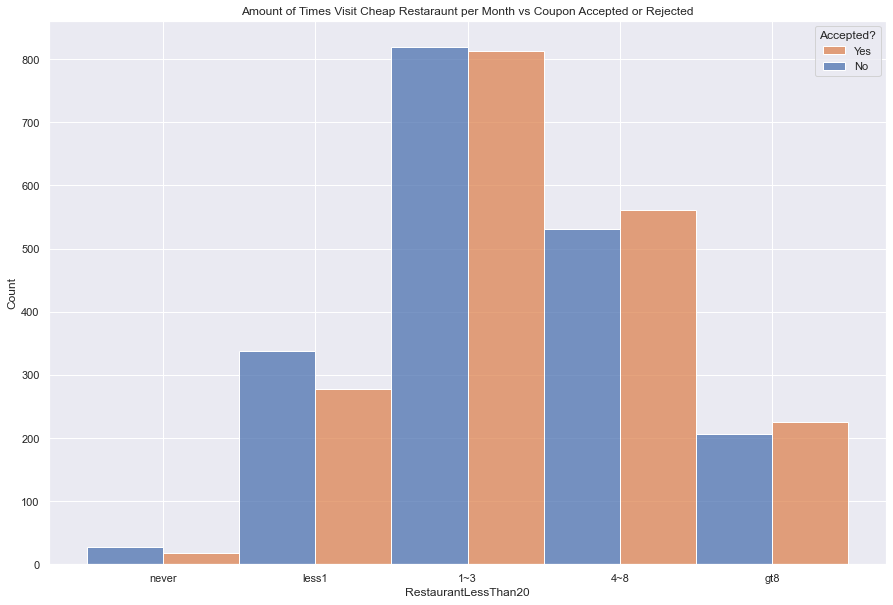

In [73]:
sns.histplot(data = data_ch, x= 'RestaurantLessThan20', hue = 'Y', multiple = 'dodge').set(
    title = 'Amount of Times Visit Cheap Restaraunt per Month vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])

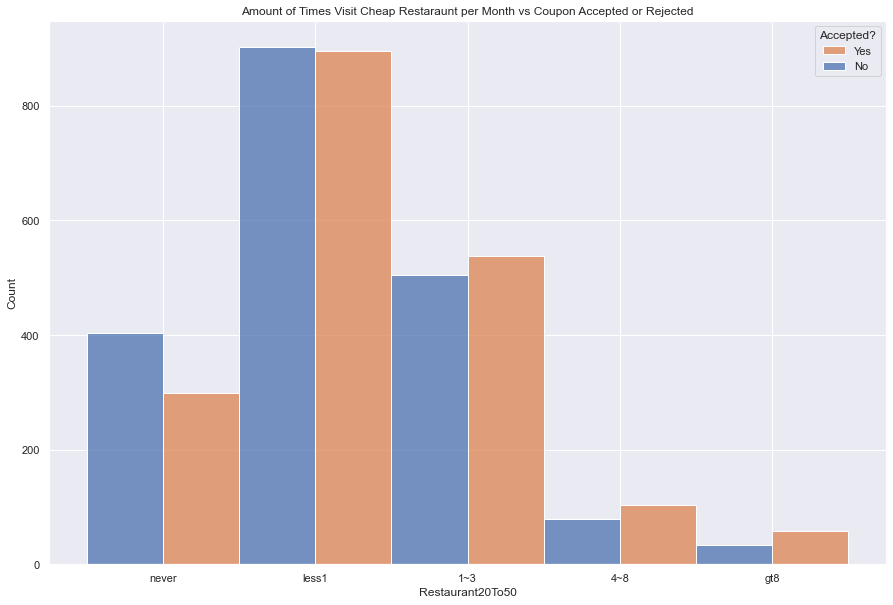

In [74]:
sns.histplot(data = data_ch, x= 'Restaurant20To50', hue = 'Y', multiple = 'dodge').set(
    title = 'Amount of Times Visit Cheap Restaraunt per Month vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])

#### It seems there are no relations to any of them other than the coffee houses themselves

### Finally, is there any relation between passengers and accepting the coupon?

In [75]:
data_ch = data[data['coupon'] == 'Coffee House']
print(data_ch['passenger'].unique())

['Friend(s)' 'Kid(s)' 'Alone' 'Partner']


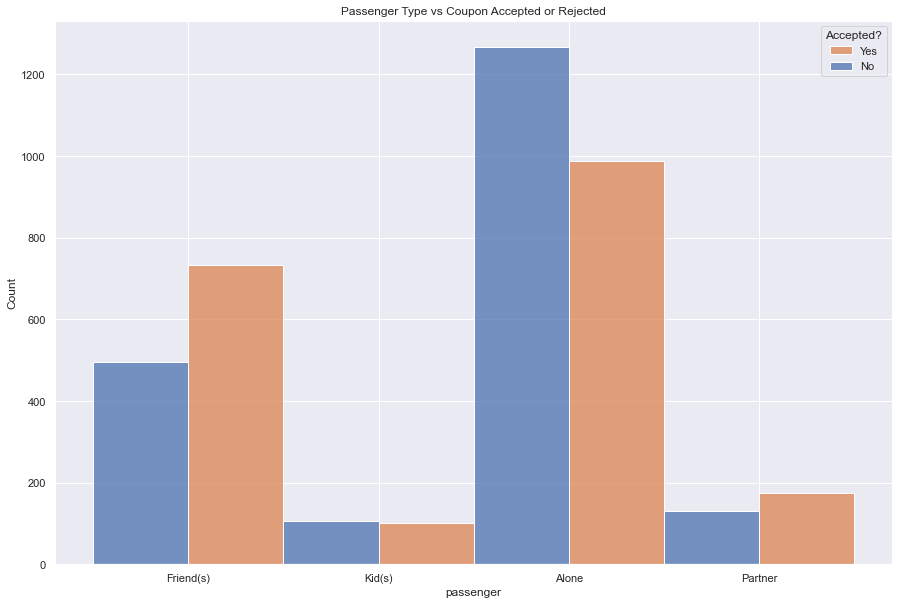

In [84]:
sns.histplot(data = data_ch, x= 'passenger', hue = 'Y', multiple = 'dodge').set(
    title = 'Passenger Type vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])
plt.savefig('figures/pass_vs_Y')

#### Those who are alone appear a bit more likely to accept vs those with passengers, let's categorize them together as such, and see this relationship:

In [77]:
data_ch['is_alone'] = data_ch['passenger'] == 'Alone'

<ipython-input-77-e5764edb4437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['is_alone'] = data_ch['passenger'] == 'Alone'


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


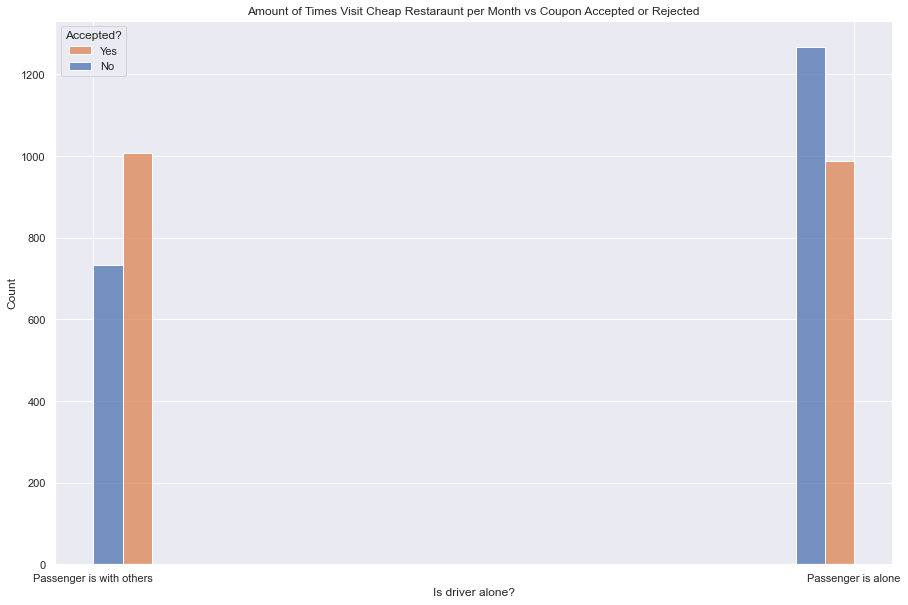

In [81]:
sns.histplot(data = data_ch, x= 'is_alone', hue = 'Y', multiple = 'dodge').set(
    title = 'Amount of Times Visit Cheap Restaraunt per Month vs Coupon Accepted or Rejected')
plt.legend(title = 'Accepted?', labels = ['Yes', 'No'])
plt.xticks([0,1], labels = ['Passenger is with others', 'Passenger is alone'])
plt.xlabel("Is driver alone?")
plt.savefig('figures/alone_vs_Y')

#### The distinction is clear here, but do these passengers tend to frequent coffee houses more themselves?

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


([<matplotlib.axis.XTick at 0x16c870f5d90>,
 [Text(0, 0, 'Passenger is with others'), Text(1, 0, 'Passenger is alone')])

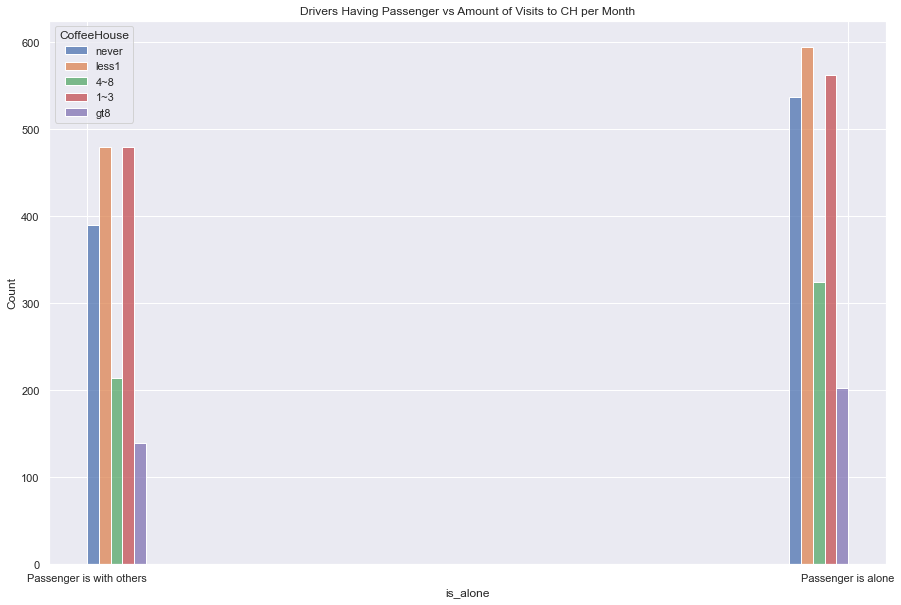

In [79]:
sns.histplot(data = data_ch, x= 'is_alone', hue = 'CoffeeHouse', multiple = 'dodge').set(
    title = 'Drivers Having Passenger vs Amount of Visits to CH per Month')
plt.xticks([0,1], labels = ['Passenger is with others', 'Passenger is alone'])

#### The answer is not really, maybe their job is the reason they travel alone more often?

<ipython-input-80-3d53064503a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ch['is_upper_q'] = data['occupation'].isin(upper_q_list)
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


([<matplotlib.axis.XTick at 0x16c876a27c0>,
 [Text(0, 0, 'Lower 75 quantile of acceptance by job'),
  Text(1, 0, 'Upper 25 quantile of acceptance by job')])

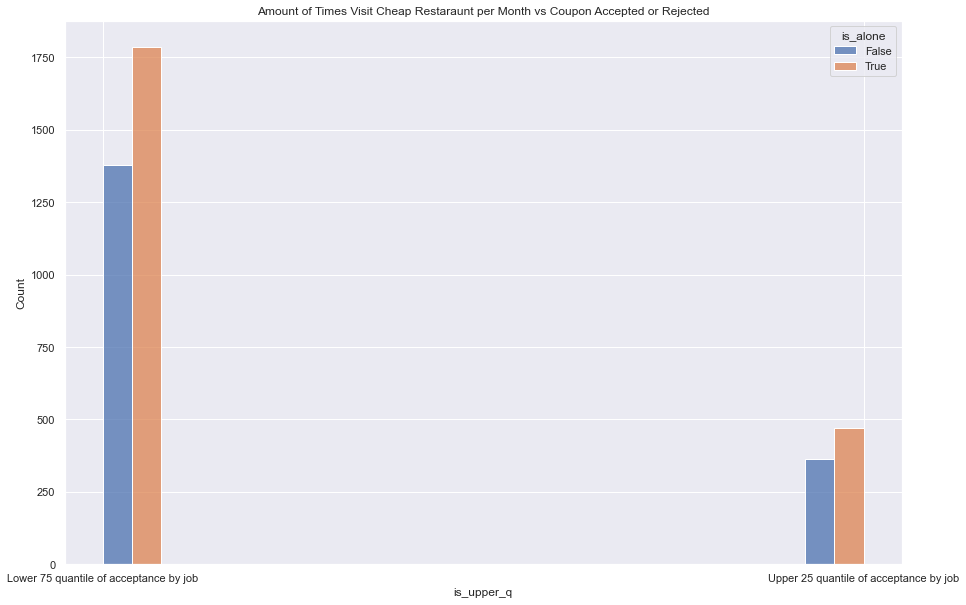

In [80]:
#let's see if jobs in the top quartile of coupon acceptance are driving more alone than the others
#We need to get the upper quartile of jobs by acceptance first:
data_ch_ordered.sort_values("Y mean", inplace = True, ascending = False)
quartiles = data_ch_ordered["Y mean"].quantile([.25, .5, .75]).tolist()
data_ch_ordered['is_upper_q'] = data_ch_ordered['Y mean'] >= quartiles[2]
data_ch_ordered_upper_q = data_ch_ordered[data_ch_ordered['is_upper_q']]
upper_q_list = list(data_ch_ordered_upper_q.index.values)
data_ch['is_upper_q'] = data['occupation'].isin(upper_q_list)

#Visualize:
sns.histplot(data = data_ch, x= 'is_upper_q', hue = 'is_alone', multiple = 'dodge').set(
    title = 'Amount of Times Visit Cheap Restaraunt per Month vs Coupon Accepted or Rejected')
plt.xticks([0,1], labels = ['Lower 75 quantile of acceptance by job', 'Upper 25 quantile of acceptance by job'])

#### We can see that there is no relation here. Given we've determined other factors such as age and income have no relation to CH coupon acceptance, we can conclude that being alone is another factor that does have some relation with accepting the coupon

### Useful Business Conclusions we have drawn
1. People are less likely accept the CH coupons in snow
2. Weather higher than room temperature is correlated with people accepting coupons for CH
3. While there is no direct correlation between being on the way to work and accepting the CH coupon, there are still certain occupations which are more or less likely to accept the coupon. Among those occupations, ones which typically drive in colder weather for one reason or another, are more likely to accept the coupon overall.
4. Income does not seem to have a relationship with acceptance of CH coupon
5. People who travel alone are more likely to accept the coupon than those who travel with others
6. **People who frequent coffee houses are significantly more likely to accept a CH coupon** --> This is the largest find